Extended Kalman Filter

In [1]:
import numpy as np
from numpy import outer
from numpy import dot, zeros, eye
import scipy.linalg as linalg
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from numpy.random import normal
import scipy as scipy
import scipy.stats
from scipy.linalg import cholesky

In [4]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

In [ ]:
#initiate state
#ESTO ES UNA PRUEBA
xpinit,dt =3,.1
x0 = [xpinit]
transitionM = np.asarray([[1]])
Q = np.asarray([[.5]])
P = eye(1)*60
sigmarange = 1
R = np.diag([sigmarange**2,sigmarange**2,sigmarange**2])
x0m = np.asarray(x0).reshape(1,1)
results1d = []
resultsP1d = []
results1d.append(x0m)
resultsP1d.append(P)
sat1x = -10
sat2x = 5,
sat3x = 12
#EKF



for i in range(int(30/dt)):
    rangem1 = measurements1d[i][0]
    rangem2 = measurements1d[i][1]
    rangem3 = measurements1d[i][2]
    sat1x = measurements1d[i][3]
    sat2x = measurements1d[i][4]
    sat3x = measurements1d[i][5]
 
    #y =np.asarray([rangem])
    
    #H matrix
    xmed =x0m[0][0]
    
    geomdist1 = 1/(((sat1x-xmed)**2 )**.5)
    geomdist2 = 1/(((sat2x-xmed)**2 )**.5)
    geomdist3 = 1/(((sat3x-xmed)**2 )**.5)
    h1 =  [-geomdist1*(sat1x-xmed)]
    h2 =  [-geomdist1*(sat1x-xmed)]
    h3 =  [-geomdist1*(sat1x-xmed)]
    hM = np.asarray([h1,h2,h3])
    #update
    k0 = np.dot(hM,np.dot(P,hM.T))+R
    k0i = linalg.inv(k0)
    #kalman gain
    Kalmang= np.dot(np.dot(P,hM.T),k0i)
    #innovation
  
    hx1 =[rangem1- abs(sat1x-xmed)]
    hx2 =[rangem2- abs(sat2x-xmed)]
    hx3 =[rangem3- abs(sat3x-xmed)]
    
    
    inno = np.asarray([hx1,hx2,hx3])
    print (inno)
    #update state and covariance matrix
   
    
    x0mn = x0m+np.dot(Kalmang,inno)
  
    results1d.append(x0mn)
    vel = x0mn-x0m
    IKH= eye(1)-np.dot(Kalmang,hM)
    P = np.dot(IKH,P)
    resultsP1d.append(P)
    #prediction
    x0m = np.dot(transitionM,x0mn)
    #x0m = x0mn + vel
 
    P=np.dot(np.dot(transitionM,P),transitionM.T)+Q
resa1d = np.asarray(results1d)
resP1d = np.asarray(resultsP1d)
resM1d = np.asarray(measurements1d)

In [35]:
#EJEMPLO DE UNA DIMENSION LINEAL
#Distancias en una sola dimension
#En dos dimensiones entrego el rango calculando el modulo entre los satelites y el vehiculo
#en una dimension simplemente es la distancia y ya
def rangos1dimension(dtime,xp1,xp2,xp3,xv,x0):
    xv += np.random.randn()*.01
    xp1 += np.random.randn()*0.0
    xp2 += np.random.randn()*0.0
    xp3 += np.random.randn()*0.0
    x0 += xv *dtime
    range_error1 = (xp1-x0)*.01*np.random.randn()
    range_error2 = (xp2-x0)*.01*np.random.randn()
    range_error3 = (xp3-x0)*.01*np.random.randn()
    rangee = abs(xp1-x0) + range_error1
    rangee2 = abs(xp2-x0) + range_error2
    rangee3 = abs(xp3-x0) + range_error3
    return [rangee,rangee2,rangee3,xp1,xp2,xp3,x0]

x1d,x2d,x3d,x0 = -10,-5,-12,0
xvv1d = 10
measurements1d = []
dt = .1
for i in range(int(30/dt)):
    medidas1dg = rangos1dimension(dt,x1d,x2d,x3d,xvv1d,x0)
    measurements1d.append(medidas1dg)
    x1d,x2d,x3d,x0 = medidas1dg[3],medidas1dg[4],medidas1dg[5],medidas1dg[6]

measurements1d = np.asarray(measurements1d)






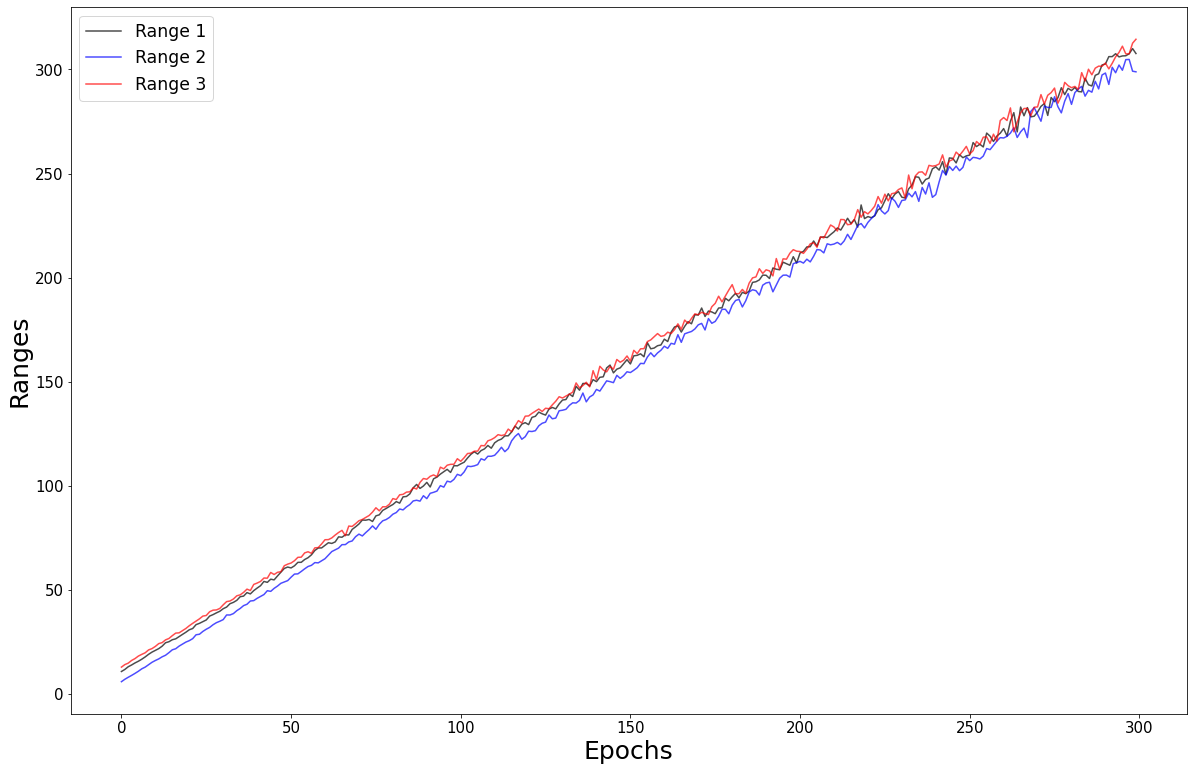

In [36]:
tims = np.arange(0,len(measurements1d))
fig = plt.figure(figsize=(20, 13))
ax = fig.add_subplot(111)

ax.plot(tims,measurements1d[:,0],c='black',alpha=.7,label="Range 1")
ax.plot(tims,measurements1d[:,1],c='blue',alpha=.7,label="Range 2")
ax.plot(tims,measurements1d[:,2],c='red',alpha=.7,label="Range 3")
#ax.set_title("L1 Carrier Phases",fontsize=30)
plt.xlabel("Epochs", fontsize = 25)
plt.ylabel(r'Ranges', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc =2,fontsize='xx-large')
plt.show()

In [42]:
#initiate state
xpinit,dt =3,.1
x0 = [xpinit]
transitionM = np.asarray([[1]])
Q = np.asarray([[.5]])
P = eye(1)*60
sigmarange = 1
R = np.diag([sigmarange**2,sigmarange**2,sigmarange**2])
x0m = np.asarray(x0).reshape(1,1)
results1d = []
resultsP1d = []
results1d.append(x0m)
resultsP1d.append(P)
sat1x = -10
sat2x = -5,
sat3x = -12
#EKF



for i in range(int(30/dt)):
    rangem1 = measurements1d[i][0]
    rangem2 = measurements1d[i][1]
    rangem3 = measurements1d[i][2]
    sat1x = measurements1d[i][3]
    sat2x = measurements1d[i][4]
    sat3x = measurements1d[i][5]
 
    #y =np.asarray([rangem])
    
    #H matrix
    xmed =x0m[0][0]
    
    
    h1 =  [1]
    h2 =  [1]
    h3 =  [1]
    hM = np.asarray([h1,h2,h3])
    #update
    k0 = np.dot(hM,np.dot(P,hM.T))+R
    k0i = linalg.inv(k0)
    #kalman gain
    Kalmang= np.dot(np.dot(P,hM.T),k0i)
    #innovation
  
    hx1 =[rangem1- abs(sat1x-xmed)]
    hx2 =[rangem2- abs(sat2x-xmed)]
    hx3 =[rangem3- abs(sat3x-xmed)]
    
    
    inno = np.asarray([hx1,hx2,hx3])
    
    #update state and covariance matrix
   
    
    x0mn = x0m+np.dot(Kalmang,inno)
  
    results1d.append(x0mn)
    vel = x0mn-x0m
    IKH= eye(1)-np.dot(Kalmang,hM)
    P = np.dot(IKH,P)
    resultsP1d.append(P)
    #prediction
    x0m = np.dot(transitionM,x0mn)
    #x0m = x0mn + vel
 
    P=np.dot(np.dot(transitionM,P),transitionM.T)+Q
resa1d = np.asarray(results1d)
resP1d = np.asarray(resultsP1d)
resM1d = np.asarray(measurements1d)


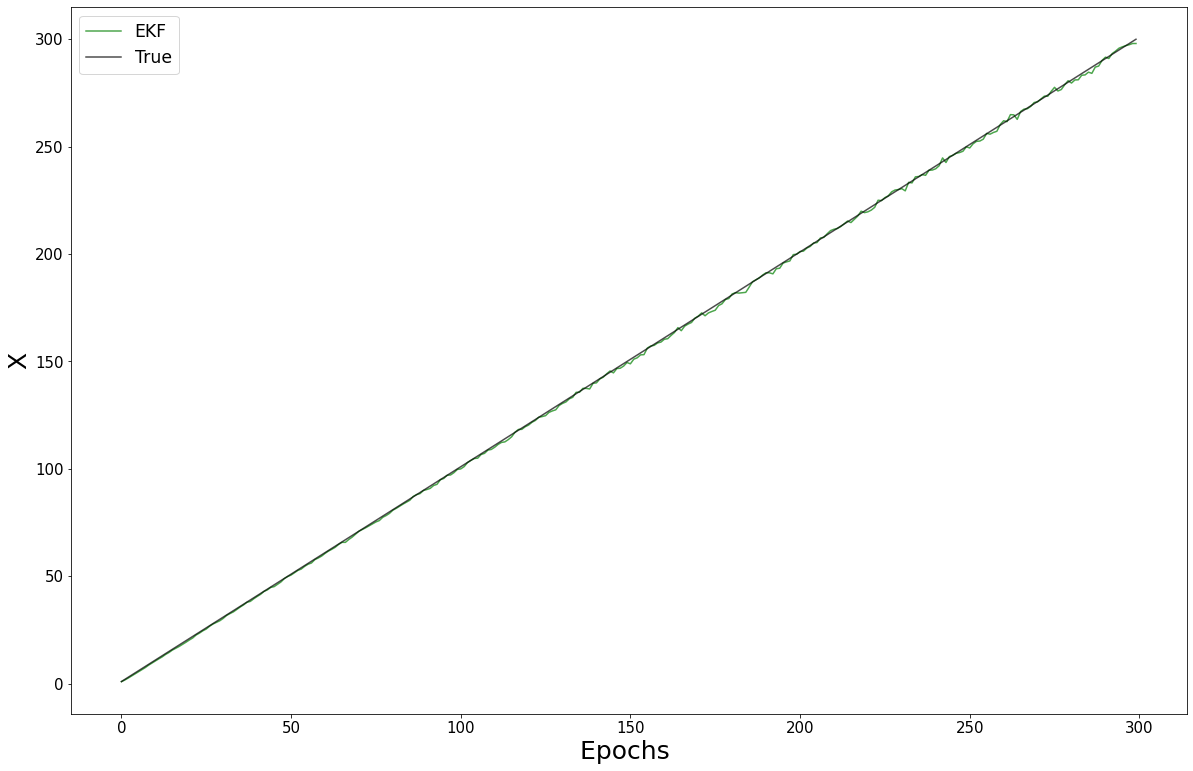

In [43]:
tims = np.arange(0,len(measurements1d))
fig = plt.figure(figsize=(20, 13))
ax = fig.add_subplot(111)

ax.plot(tims[:],resa1d[1:,0,0],c='green',alpha=.7,label="EKF")
ax.plot(tims[:],measurements1d[:,6],c='black',alpha=.7,label="True")
#ax.set_title("L1 Carrier Phases",fontsize=30)
plt.xlabel("Epochs ", fontsize = 25)
plt.ylabel(r'X', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc =2,fontsize='xx-large')
plt.show()

In [45]:
sat1x = -10
sat2x = -5,
sat3x = -12
satsx = [sat1x,sat2x,sat3x]

def generateWeights(medidas,arregloParticulas,sigmaR):
    
    N = len(arregloParticulas)
   
    #generate weights equal for each Particle
    wlist = np.array([1.0]*N)
    
   
    for j in range(len(medidas)):
        distancias= []
        for i in range(N):
            distancias.append(medidas[j]-(abs(satsx[j]-arregloParticulas[i][0])))
            
        distancias = np.asarray(distancias)
        wlist *= scipy.stats.norm(distancias[:],sigmaR).pdf(0)
    wlist += 1.e-300
    wlist /=sum(wlist)
    return wlist

In [46]:
def resample(nParticulas,weights):
    N = nParticulas

    positions = (np.arange(N)+ np.random.random())/N
    indexes = np.zeros(N,'i')
    cumulative_sum = np.cumsum(weights)
    f, j = 0, 0
    while f < N and j<N:
        if positions[f] < cumulative_sum[j]:
            indexes[f] = j
            f +=1
        else:
            j +=1
    #indices = deliver(indexes)
    return indexes

In [47]:
def initializeGauss(statex,variances,numberP,numStates,matrizP):
    #draw states from statex and priorx
    arregloParticulas = np.empty((numberP,numStates))
    arregloParticulas[:,0] = normal(statex[0],variances[0],size=numberP)
   
    #set Pi for every sample
    Pi = []
    xm = np.average(arregloParticulas,axis=0)
    for i in range(numberP):
        Pi.append(matrizP)
    Pi = np.asarray(Pi)
    
    
   
    return arregloParticulas, Pi

In [48]:
def pesosUT(numberStates,alpha,kappa,beta):
    numberSigmas = numberStates *2 +1
    Lam = alpha**2*(numberStates+ kappa) -numberStates
    #compute weights for sigma points amd for P
    cw = .5/ (numberStates + Lam)
    wcovariance = np.full(numberSigmas,cw)
    wcovariance[0] = Lam/(numberStates+Lam)+ (1-alpha**2 +beta)
    wmean = np.full(numberSigmas,cw)
    wmean[0]= Lam/(numberStates+Lam)
    return wmean, wcovariance


def puntosSigma(numberStates,alpha,kappa,beta,x0,P):
    numberSigmas = numberStates *2 +1 #number of points
    Lam = alpha**2*(numberStates+ kappa) -numberStates
    #compute weights for sigma points amd for P
    
    
    #sigma Points
    sigmaPointsx = np.zeros((numberSigmas,numberStates))
   
    root = cholesky((Lam +numberStates)*P)
    sigmaPointsx[0]=x0
    
    for j in range(numberStates):
        dif1 = x0 + root[j]
        dif2 = x0 - root[j]
        sigmaPointsx[j+1] =dif1
        sigmaPointsx[numberStates+j+1] = dif2
    return sigmaPointsx

In [90]:
def measurementPoints(sigmaPfx,satx,numberStates,numberMeasurements):
    numberSigmas = numberStates *2+1
    #transform sigma points into measurements
    sigmaPointsy = np.zeros((numberSigmas,numberMeasurements))
    sigmahx = [] #measurements
  
    for sp in sigmaPfx:
        med = []
        
        med.append(abs(satx[0]-sp[0]))
        med.append(abs(satx[1]-sp[0]))
        med.append(abs(satx[2]-sp[0]))
        sigmahx.append(med)
  
    sigmaPointsy = np.atleast_2d(sigmahx)
    return sigmaPointsy

In [91]:
def propagatePoints(trM, sPx,numberStates):
    numberSigmas = numberStates *2+1 
    sigmaPointsFx = np.zeros((numberSigmas,numberStates))
    for j in range(len(sPx)):
        sigmaPointsFx[j]=np.dot(trM,sPx[j])
    return sigmaPointsFx

In [92]:
def crossCov(sigmaPointsFx,sigmaPointsy,x0m,yp,wcovariance):
    Pxy = np.zeros((sigmaPointsFx.shape[1],sigmaPointsy.shape[1]))
    numberSigmax = sigmaPointsFx.shape[0]
    for j in range(numberSigmax):
        dx = sigmaPointsFx[j] - x0m
        dy = sigmaPointsy[j]-yp
        Pxy += wcovariance[j] * outer(dx,dy)
    return Pxy

In [93]:
def uT(wm,wcov,sigmaPfx,Qm):
    
    x0m= np.dot(wm,sigmaPfx)
    #Compute P
    difP = sigmaPfx -x0m[np.newaxis,:]
    P = np.dot(difP.T,np.dot(np.diag(wcov),difP))
    P += Qm
    return x0m, P

In [94]:
def importanceSampling(particulas,Pi,numStates,numberMeas,sax,Q,R,transitionM,medidas):
    #parameters for unscented sigma points
    alpha = .1
    kappa = 0
    beta =2
    particulasMoved = np.empty((len(particulas),numStates))
    matricesP = []
    for i in range(len(particulas)):
        #update the particles through the Unscented Kalman Filter
        #calculate Sigma Points 
        xm = particulas[i,:]
        wme, wcov = pesosUT(numStates,alpha,kappa,beta)
      
        sPX=puntosSigma(numStates,alpha,kappa,beta,xm,Pi[i])
        #propagate through fx
        sPFX = propagatePoints(transitionM, sPX,numStates)
        xm ,P = uT(wme,wcov,sPFX,Q)
        #compute new sigma points from propagation
     
        sPX = puntosSigma(numStates,alpha,kappa,beta,xm,P)
        sPFX = sPX
     
        #map points into measurement domain
        SPY = measurementPoints(sPFX,sax,numStates,numberMeas)
      
        yp ,Sy = uT(wme,wcov,SPY,R)
       
        Syi = np.linalg.inv(Sy)
        #crosss covariance of measurements and state
        Pxy =crossCov(sPFX,SPY,xm,yp,wcov)
        #compute kalman gain
        kalman = np.dot(Pxy,Syi)
        #innovation
        inno = medidas-yp
        #update with Kalman Gain
        xm = np.add(xm,np.dot(kalman,inno))
        P = P - np.dot(kalman,np.dot(Sy,kalman.T))
        #sample from this distribution
        particulasMoved[i,0]= normal(xm[0],P[0,0]**.5)
        
        matricesP.append(P)
    matricesP = np.asarray(matricesP)
    return particulasMoved, matricesP

In [95]:
resultsPF = []
resultsPFP = []
numerodeParticles = 50
xpinit,dt =3,.1
x0 = [xpinit]
transitionM = np.asarray([[1]])
sigmarange = 1
R = np.diag([sigmarange**2,sigmarange**2,sigmarange**2])
P =eye(1)*60
Q = np.asarray([[0.5]])
numberStates =1
numberMeasurements =3 
sat1x = -10
sat2x = -5
sat3x = -12
satsx = [sat1x,sat2x,sat3x]

variances = [P[0,0]**.5]
#initialize filter
arregloPart, arregloPi = initializeGauss(x0,variances,numerodeParticles,numberStates,P)

for k in range(int(30/dt)):
    rangem1 = measurements1d[k][0]
    rangem2 = measurements1d[k][1]
    rangem3 = measurements1d[k][2]
    medidas = np.asarray([rangem1,rangem2,rangem3])
    #local linearization through Unscented Kalman Filter
 
    particulasMoved, matricesP = importanceSampling(arregloPart,arregloPi,numberStates,numberMeasurements,satsx,Q,R,transitionM,medidas)
    #weight the particles 
    pesos =generateWeights(medidas,particulasMoved,sigmarange)
    #resample
    indices= resample(numerodeParticles,pesos)
    arregloPart[:]= particulasMoved[indices]
    pesos= pesos[indices]
    pesos /= np.sum(pesos)
    arregloPi [:]= matricesP[indices]
    #estimation
    est = np.average(arregloPart,weights = pesos, axis =0)
    sumatoria = 0
    for j in range(numerodeParticles):
        sumatoria += np.outer(arregloPart[j,:]-est, arregloPart[j,:]-est)
    Px = sumatoria /(numerodeParticles-1)
    resultsPF.append(est)
    resultsPFP.append(Px)
resultsPFa = np.asarray(resultsPF)
resultsPFP = np.asarray(resultsPFP)

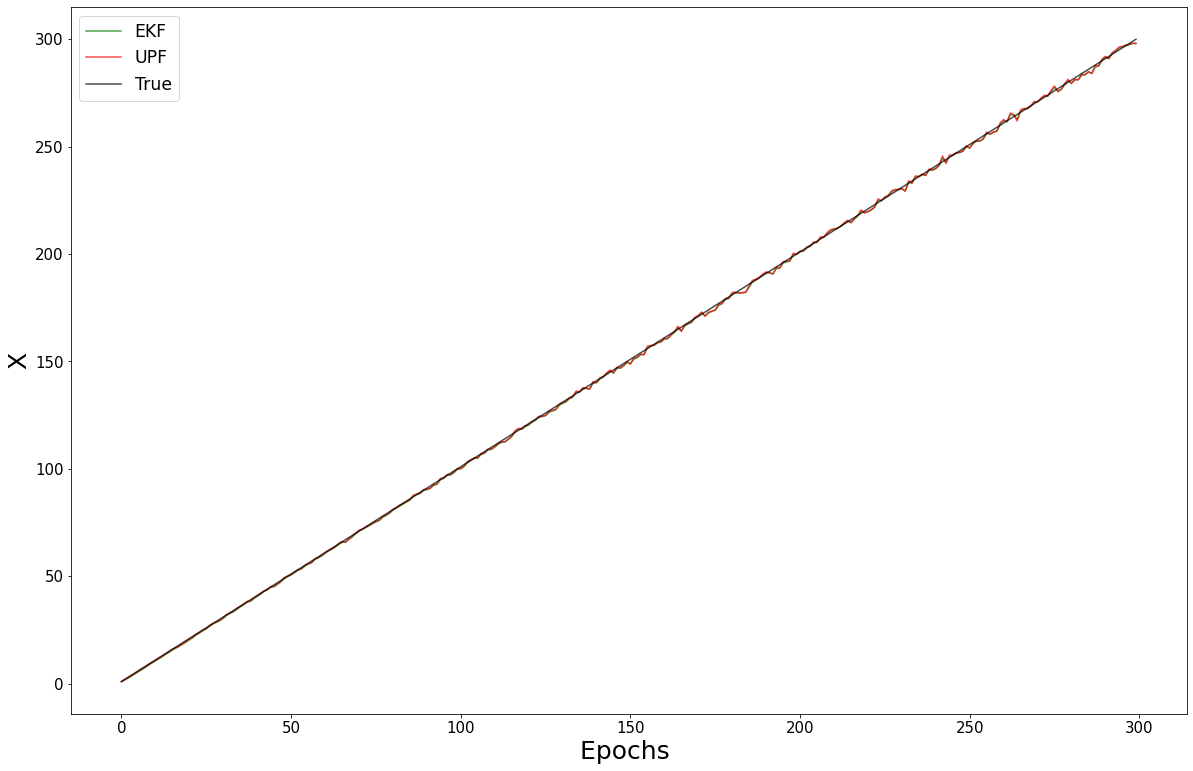

In [97]:
tims = np.arange(0,len(measurements1d))
fig = plt.figure(figsize=(20, 13))
ax = fig.add_subplot(111)

ax.plot(tims[:],resa1d[1:,0,0],c='green',alpha=.7,label="EKF")
ax.plot(tims[:],resultsPFa[:,0],c='red',alpha=.7,label="UPF")
ax.plot(tims[:],measurements1d[:,6],c='black',alpha=.7,label="True")
#ax.set_title("L1 Carrier Phases",fontsize=30)
plt.xlabel("Epochs ", fontsize = 25)
plt.ylabel(r'X', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc =2,fontsize='xx-large')
plt.show()

In [103]:
def sampleGaussian(variances,valoresIniciales,numeroP,numStates):
    arregloParticulas = np.empty((numeroP,numStates))
    arregloParticulas[:,0] = normal(valoresIniciales[0],variances,size=numeroP)
  
    
    return arregloParticulas

In [107]:
def prediccionPF(arregloParticulas,deltat,std,flag):
    N = len(arregloParticulas)
    if (flag):
        
        arregloParticulas[:,0] += np.random.randn(N)*(abs(std[0]))
  
        
    return arregloParticulas

In [108]:
numerodeParticles =50

resultsPF1 = []
resultsPFP1 = []
sigmarange = 1

f = True


xpinit,dt =3,.1
x0 = [xpinit]

sigmarange = 1

P =eye(1)*60

numStates =1

#Q = np.asarray([[2.5e-06, 5.0e-05,0],
#       [5.0e-05, 1.0e-02,0],[0,0,.01]])
#Q = np.asarray([[2.5e-04, 5.0e-05,0],
 #      [5.0e-05, 1.0e-02,0],[0,0,1]])
#stdQ = [Q[0,0]**1,Q[1,1]**1,Q[2,2]**1]
#stdQ = [Q[0,0]**.5,Q[1,1]**.5,Q[2,2]**.5]
stdQ = [.5]
particulas = sampleGaussian(P[0,0],x0,numerodeParticles,numStates)
for i in range(int(30/dt)):
    rangem1 = measurements1d[i][0]
    rangem2 = measurements1d[i][1]
    rangem3 = measurements1d[i][2]
    medida=[rangem1,rangem2,rangem3]
    #weight particles
    pesos =generateWeights(medida,particulas,sigmarange)
    #update
    indices= resample(numerodeParticles,pesos)
    particulas[:]= particulas[indices]
    pesos= pesos[indices]
    pesos /= np.sum(pesos)
    #estimation
    est = np.average(particulas,weights = pesos, axis =0)
    sumatoria = 0
    for j in range(numerodeParticles):
        sumatoria += np.outer(particulas[j,:]-est, particulas[j,:]-est)
    Px = sumatoria /(numerodeParticles-1)
    resultsPF1.append(est)
    resultsPFP1.append(Px)
    #prediction
    particulas = prediccionPF(particulas,dt,stdQ,f)
resultsPFa1 = np.asarray(resultsPF1)
resultsPFP1 = np.asarray(resultsPFP1)

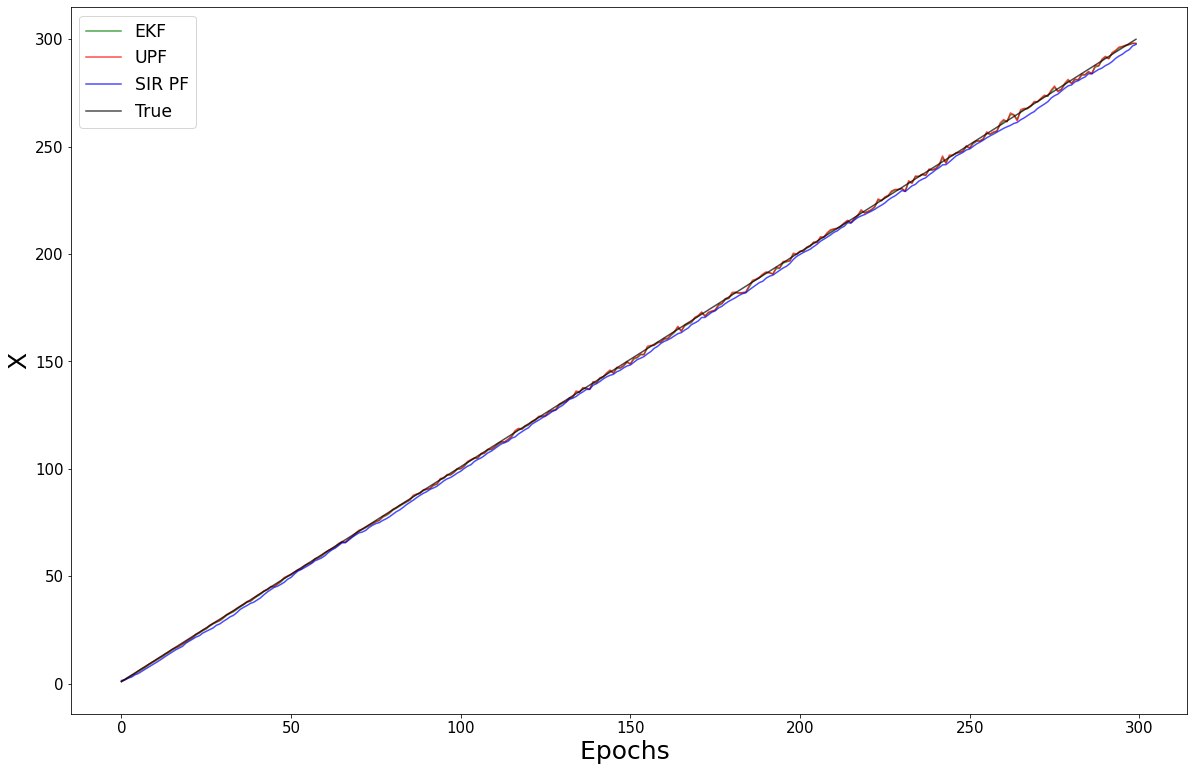

In [109]:
tims = np.arange(0,len(measurements1d))
fig = plt.figure(figsize=(20, 13))
ax = fig.add_subplot(111)

ax.plot(tims[:],resa1d[1:,0,0],c='green',alpha=.7,label="EKF")
ax.plot(tims[:],resultsPFa[:,0],c='red',alpha=.7,label="UPF")
ax.plot(tims[:],resultsPFa1[:,0],c='blue',alpha=.7,label="SIR PF")
ax.plot(tims[:],measurements1d[:,6],c='black',alpha=.7,label="True")
#ax.set_title("L1 Carrier Phases",fontsize=30)
plt.xlabel("Epochs ", fontsize = 25)
plt.ylabel(r'X', fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc =2,fontsize='xx-large')
plt.show()